# Proyek Analisis Data: [Bike Sharing]
- **Nama:** Ikhzan Wicaksono
- **Email:** wicaksonoikhzan@gmail.com
- **ID Dicoding:** ikhzan_wicaksono

## Menentukan Pertanyaan Bisnis

- Perbedaan peminjaman sepeda pada hari kerja dan hari libur?
- Bagaimana pengaruh musim dan cuaca terhadap tren penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Berhasil memuat dataset menggunakan pd.read.csv()
- Berhasil memuat tabel dari dataset. hour.csv (data bike share per jam) dan day.csv (data bike share harian).
- Data siap unutk dinilai lebih lanjut untuk mencari potensi masalah, seperti missing values, duplikasi, dan lain-lain.

### Assessing Data

In [ ]:
# Melihat info data type dari day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Melihat missing values
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
# Melihat duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Melihat data type hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# Melihat missing values hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
# Melihat duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dataset terdiri dari dua file yaitu, day.csv(data bike share harian) dan hour.csv(data bike share per jam).
- Tidak ditemukan missing values dalam kedua dataset.
- Tidak ditemukan duplikasi data dalam kedua dataset.
- Kolom tanggal (dteday) perlu diubah formatnya menjadi datetime.
- Kolom season dan weathersit masih dalam format numerik dan perlu diberi label deskriptif.
season: 1, 2, 3, 4 (harusnya Spring, Summer, Fall, Winter)
weathersit: 1, 2, 3, 4 (harusnya Clear, Mist, Light Rain, Heavy Rain)
-Beberapa nilai di windspeed dalam data hour_df adalah 0, tidak realistis karena angin selalu memiliki kecepatan tertentu.
- Perlu dilakukan pengecekan lebih lanjut terhadap outlier dalam dataset sebelum masuk ke tahap Cleaning.

### Cleaning Data

In [ ]:
# Cek data type dari kolom dteday d kedua dataset
print("Kolom 'dteday' di hour_df: ", hour_df.dteday.head())
print("Kolom 'dteday' di day_df: ", day_df.dteday.head())

Kolom 'dteday' di hour_df:  0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: dteday, dtype: object
Kolom 'dteday' di day_df:  0    2011-01-01
1    2011-01-02
2    2011-01-03
3    2011-01-04
4    2011-01-05
Name: dteday, dtype: object


In [ ]:
# Ubah tipe data kolom dteday
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

print("kolom dteday di day_df:", day_df.dteday.head())
print("kolom dteday di day_df:", hour_df.dteday.head())

kolom dteday di day_df: 0   2011-01-01
1   2011-01-02
2   2011-01-03
3   2011-01-04
4   2011-01-05
Name: dteday, dtype: datetime64[ns]
kolom dteday di day_df: 0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: dteday, dtype: datetime64[ns]


In [ ]:
# Melihat kategori yang masih numerik / unik
print("Kategori yang masih numerik di season:", day_df.season.unique())
print("Kategori yang masih numerik di weathersit:", day_df.weathersit.unique())

Kategori yang masih numerik di season: [1 2 3 4]
Kategori yang masih numerik di weathersit: [2 1 3]


In [ ]:
# Mengubah kategori unik pada season dan weathersit
season_dict = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}
weathersit_dict = {
    1: "Clear, Few clouds",
    2: "Mist, Cloudy",
    3: "Light Snow, Light Rain",
    4: "Heavy Rain, Ice Pallets"
}
# Mengganti elemmen numerik pada season
day_df["season"] = day_df["season"].replace(season_dict)
day_df["weathersit"] = day_df["weathersit"].replace(weathersit_dict)

# Mengganti elemmen numerik pada season dan weathersit
hour_df["season"] = hour_df["season"].replace(season_dict)
hour_df["weathersit"] = hour_df["weathersit"].replace(weathersit_dict)

In [ ]:
# Cek apakah elemen berubah
print("Elemen season setelah diubah:", day_df.season.unique())
print("Elemen weathersit setelah diubah:", day_df.weathersit.unique())

# Cek pada kolom season
print("\nKolom season di day_df: ", day_df.season.value_counts())
print("\nKolom season di hour_df: ", hour_df.season.value_counts())

# Cek pada kolom weathersit
print("\nKolom weathersit di hour_df: ", hour_df.weathersit.value_counts())
print("\nKolom weathersit di day_df: ", day_df.weathersit.value_counts())

Elemen season setelah diubah: ['Spring' 'Summer' 'Fall' 'Winter']
Elemen weathersit setelah diubah: ['Mist, Cloudy' 'Clear, Few clouds' 'Light Snow, Light Rain']

Kolom season di day_df:  season
Fall      188
Summer    184
Spring    181
Winter    178
Name: count, dtype: int64

Kolom season di hour_df:  season
Fall      4496
Summer    4409
Spring    4242
Winter    4232
Name: count, dtype: int64

Kolom weathersit di hour_df:  weathersit
Clear, Few clouds          11413
Mist, Cloudy                4544
Light Snow, Light Rain      1419
Heavy Rain, Ice Pallets        3
Name: count, dtype: int64

Kolom weathersit di day_df:  weathersit
Clear, Few clouds         463
Mist, Cloudy              247
Light Snow, Light Rain     21
Name: count, dtype: int64


In [ ]:
# Melihat distribusi dalam kolom windspeed
print("Distribusi nilai dalam kolom windspeed:" , hour_df.windspeed.value_counts())

Distribusi nilai dalam kolom windspeed: windspeed
0.0000    2180
0.1343    1738
0.1642    1695
0.1940    1657
0.1045    1617
0.2239    1513
0.0896    1425
0.2537    1295
0.2836    1048
0.2985     808
0.3284     602
0.3582     460
0.3881     381
0.4179     296
0.4478     176
0.4627     146
0.4925     112
0.5224      84
0.5821      44
0.5522      39
0.6119      23
0.6418      14
0.6567      11
0.6866       5
0.7463       2
0.8060       2
0.8507       2
0.7164       2
0.7761       1
0.8358       1
Name: count, dtype: int64


In [ ]:
# Mengganti nilai 0 pada windspeed dengan median dari data windspeed
hour_df["windspeed"] = hour_df["windspeed"].replace(0, hour_df["windspeed"].median())

# Cek nilai 0 pada windspeed
hour_df["windspeed"].value_counts()

,count
windspeed,
0.1940,3837
0.1343,1738
0.1642,1695
0.1045,1617
0.2239,1513
0.0896,1425
0.2537,1295
0.2836,1048
0.2985,808


**Insight:**
- Memperbaiki data type pada kolom dteday menjadi datetime.
- Memperbaiki nilai numerik/unik pada kolom season dan weathersit agar menjadi lebih sesuai.
- Nilai 0 pada kolom windspeed dalam hour_df sudah diganti dengan mediannya agar mempermudah proses analisis.

## Exploratory Data Analysis (EDA)

### Explore

#### EDA untuk pertanyaan 1

In [ ]:
# Melihat data statistik dalam hour_df

print("Statistik hour_df:")
hour_df.describe(include="all")

Statistik hour_df:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,NaN,"Clear, Few clouds",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,NaN,NaN,NaN,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,NaN,0.496987,0.475775,0.627229,0.214433,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
# Menghitung rata-rata peminjaman sepeda per jam dalam sehari
per_jam = hour_df.groupby("hr")["cnt"].mean()
print("Rata rata peminjaman sepeda per jam dalam sehari:", per_jam)

Rata rata peminjaman sepeda per jam dalam sehari: hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


In [ ]:
# Menghitung waktu peminjaman sepeda saat hari kerja
hari_kerja = hour_df[hour_df["workingday"] == 1].groupby("hr")["cnt"].mean()
print("Rata rata peminjaman sepeda saat hari kerja:", hari_kerja)

# Menghitung waktu peminjaman sepeda saat hari libur
hari_libur = hour_df[hour_df["workingday"] == 0].groupby("hr")["cnt"].mean()
print("\nRata rata peminjaman sepeda saat hari libur:", hari_libur)


Rata rata peminjaman sepeda saat hari kerja: hr
0      36.786290
1      16.552632
2       8.683778
3       4.942553
4       5.429787
5      24.913131
6     102.500000
7     290.612903
8     477.006048
9     241.518145
10    135.366935
11    158.229839
12    200.820926
13    198.429719
14    183.572289
15    201.331325
16    293.122244
17    525.290581
18    492.226908
19    348.401606
20    249.718876
21    186.287149
22    138.389558
23     88.708835
Name: cnt, dtype: float64

Rata rata peminjaman sepeda saat hari libur: hr
0      90.800000
1      69.508696
2      53.171053
3      25.775330
4       8.264317
5       8.689189
6      18.742358
7      43.406926
8     105.653680
9     171.623377
10    255.909091
11    315.316017
12    366.259740
13    372.731602
14    364.645022
15    358.813853
16    352.727273
17    323.549784
18    281.056522
19    231.673913
20    174.739130
21    142.060870
22    116.060870
23     85.930435
Name: cnt, dtype: float64


In [ ]:
# Menghitung waktu jumlah peminjaman tertinggi, terendah, dan rata rata pada hari kerja
max_hari_kerja = hari_kerja.idxmax()
max_hari_kerja1 = hari_kerja.max()

min_hari_kerja = hari_kerja.idxmin()
min_hari_kerja1 = hari_kerja.min()

mean_hari_kerja = hari_kerja.idxmax()
mean_hari_kerja1 = hari_kerja.mean()

print("Hari Kerja/Working Day")
print(f"Peminjaman tertinggi terjadi pada pukul {max_hari_kerja}:00 sebanyak {max_hari_kerja1:.0f} sewa.")
print(f"Peminjaman terendah terjadi pada pukul {min_hari_kerja}:00 sebanyak {min_hari_kerja1:.0f} sewa.")
print(f"Rata rata peminjaman terjadi pada pukul {mean_hari_kerja}:00 sebanyak {mean_hari_kerja1:.0f} sewa.")

Hari Kerja/Working Day
Peminjaman tertinggi terjadi pada pukul 17:00 sebanyak 525 sewa.
Peminjaman terendah terjadi pada pukul 3:00 sebanyak 5 sewa.
Rata rata peminjaman terjadi pada pukul 17:00 sebanyak 192 sewa.


In [ ]:
# Menghitung waktu jumlah peminjaman tertinggi, terendah, dan rata rata pada hari libur
max_hari_libur = hari_libur.idxmax()
max_hari_libur1 = hari_libur.max()

min_hari_libur = hari_libur.idxmin()
min_hari_libur1 = hari_libur.min()

mean_hari_libur = hari_libur.idxmax()
mean_hari_libur1 = hari_libur.mean()

print("Hari Libur/Weekend/Holiday")
print(f"Peminjaman tertinggi terjadi pada pukul {max_hari_libur}:00 sebanyak {max_hari_libur1:.0f} sewa.")
print(f"Peminjaman terendah terjadi pada pukul {min_hari_libur}:00 sebanyak {min_hari_libur1:.0f} sewa.")
print(f"Rata rata peminjaman terjadi pada pukul {mean_hari_libur}:00 sebanyak {mean_hari_libur1:.0f} sewa.")

Hari Libur/Weekend/Holiday
Peminjaman tertinggi terjadi pada pukul 13:00 sebanyak 373 sewa.
Peminjaman terendah terjadi pada pukul 4:00 sebanyak 8 sewa.
Rata rata peminjaman terjadi pada pukul 13:00 sebanyak 181 sewa.


**Insight:**
- Pada Hari kerja terjadi lonjakan peminjaman sepeda pada pukul 17:00 - 18:00 dengan tertinggi peminjaman sepeda pada pukul 17:00 dengan jumlah peminjaman sebanyak 525, dan terendah pada sore hari pada pukul 3 dengan jumlah peminjam sebanyak 5 sewa.
Rata rata orang meminjam sepeda pada pukul 17:00 - 18:00 dengan rata-rata jumlah sewa dan terjadi juga pada pagi hari yaitu pukul 8:00. Hal ini menandakan bahwa pada rentang waktu tersebut terjadi rush hour, mengikuti jam masuk dan pulang baik kerja ataupun sekolah, diikuti penurunan pada dini hari.

- Pada Hari libur, terdapat perbedaan yang cukup signifikan pada jam pemakaian sepedanya, pada hari libur orang lebih cenderung menggunakan sepeda pada siang hari, hal ini ditunjukan dengan jumlah sewa tertinggi pada pukul 13:00 dengan 373 sewa, sedangkan pada yang terendah terjadi pukul 4:00 dengan hanya 8 sewa. Rata rata peminjaman sepeda pun terjadi pada rentang pukul 13:00 dengan 181 sewa. Berbeda dengan hari kerja, saat libur peminjaman sepeda cenderung terjadi di siang hari. Hal itu menunjukan bahwa aktivitas orang-orang saat hari libur cenderung ramai pada siang hari dan sore hari.

#### EDA untuk pertanyaan 2

In [ ]:
# Menghitung mean, median dan total peminjaman sepeda berdasarkan musim
musim_df = day_df.groupby("season")["cnt"].agg(["mean", "median", "sum"])
print("\nJumlah peminjaman sepeda berdasarkan musim\n",musim_df)

# Menghitung mean, median dan total peminjaman sepeda berdasarkan cuaca
cuaca_df = day_df.groupby("weathersit")["cnt"].agg(["mean", "median", "sum"])
print("\nJumlah peminjaman sepeda berdasarkan cuaca\n", cuaca_df)


Jumlah peminjaman sepeda berdasarkan musim
                mean  median      sum
season                              
Fall    5644.303191  5353.5  1061129
Spring  2604.132597  2209.0   471348
Summer  4992.331522  4941.5   918589
Winter  4728.162921  4634.5   841613

Jumlah peminjaman sepeda berdasarkan cuaca
                                mean  median      sum
weathersit                                          
Clear, Few clouds       4876.786177  4844.0  2257952
Light Snow, Light Rain  1803.285714  1817.0    37869
Mist, Cloudy            4035.862348  4040.0   996858


In [ ]:
# Hitung distribusi berdasarkan musim
musim_df = day_df.groupby("season")["cnt"].describe()
print("\nDistribusi peminjaman sepeda berdasarkan musim\n", musim_df)

# Hitung Distribusi cuaca
cuaca_df = day_df.groupby("weathersit")["cnt"].describe()
print("\nDistribusi peminjaman sepeda berdasarkan cuaca\n", cuaca_df)


Distribusi peminjaman sepeda berdasarkan musim
         count         mean          std     min     25%     50%      75%  \
season                                                                     
Fall    188.0  5644.303191  1459.800381  1115.0  4586.5  5353.5  6929.25   
Spring  181.0  2604.132597  1399.942119   431.0  1538.0  2209.0  3456.00   
Summer  184.0  4992.331522  1695.977235   795.0  4003.0  4941.5  6377.00   
Winter  178.0  4728.162921  1699.615261    22.0  3615.5  4634.5  5624.50   

           max  
season          
Fall    8714.0  
Spring  7836.0  
Summer  8362.0  
Winter  8555.0  

Distribusi peminjaman sepeda berdasarkan cuaca
                         count         mean          std    min     25%  \
weathersit                                                               
Clear, Few clouds       463.0  4876.786177  1879.483989  431.0  3636.5   
Light Snow, Light Rain   21.0  1803.285714  1240.284449   22.0   705.0   
Mist, Cloudy            247.0  4035.862348  180

**Insight:**
- Musim dengan jumlah peminjaman tertinggi:
Fall (Musim Gugur) memiliki jumlah peminjaman tertinggi dengan total 1.061.129 peminjaman dan rata-rata 5.644 peminjaman per hari.
Musim gugur juga memiliki median peminjaman 5.353 dan distribusi peminjaman yang lebih stabil dibandingkan musim lainnya.

- Musim dengan jumlah peminjaman terendah:
Spring (Musim Semi) memiliki jumlah peminjaman terendah dengan total 471.348 peminjaman dan rata-rata 2.604 peminjaman per hari.
Median peminjaman hanya 2.209, yang jauh lebih rendah dibanding musim lainnya.

- Musim panas (Summer) dan musim dingin (Winter) memiliki pola peminjaman yang tinggi, tetapi masih di bawah musim gugur (Fall), hal ini menunjukan bahwa walaupun dalam kondisi musin yang tidak baik dan cenderung bersalju, aktivitas penggunaan speda justru lebih tinggi dibandingkan musim semi (Spring), menunjukan bahwa orang-orang masih menggunakan sepeda sebagai salah satu alat transportasi utama hal ini didukung oleh faktor cuaca yanng mendukung.

- Orang-orang cenderung lebih banyak menggunakan sepeda saat musim dan cuacanya memungkinkan untuk menggunakan sepeda. Hal ini sejalan dengan sebanyak 2.257.952
sewa sepeda terjadi pada cuaca cerah dan sedikit berawan (Clear, Few clouds). Peminjaman sepeda paling sedikit terjadi saat cuacanya bersalju dan hujan ringan (Light Snow, Light Rain) sebanyak 37.869, sangat bebeda jauh sekali saat cuacanya cerah. Cukup signifikan dibanding saat berkabut dan berawan (Mist, Cloudy) sebanyak 996.858.

- Pengaruh musim tidak begitu jauh signifikan terhadap jumlah peminjaman sepeda, berbeda dengan cuaca yang sangat berpengaruh dengan jumlah peminjaman sepeda. Karena musim-musim yang ada bisa memiliki cuaca yang berbeda beda, masyarakat lebih cenderung menggunakan sepeda saat cuacanya memungkinkan, sepert saat cerah ataupun berawan. Jarang sekali masyaraka yang meminjam dan menggunakan sepeda saat musim salju dan hujan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Perbedaan peminjaman sepeda pada hari kerja dan hari libur?

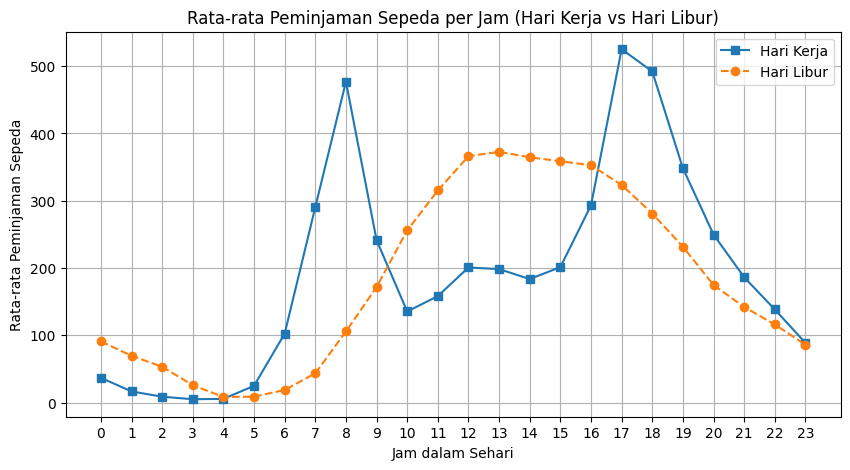

In [ ]:
# Data peminjaman sepeda berdasarkan jam untuk hari kerja dan akhir pekan
hari_kerja = hour_df[hour_df["workingday"] == 1].groupby("hr")["cnt"].mean()
hari_libur = hour_df[hour_df["workingday"] == 0].groupby("hr")["cnt"].mean()

# line chart
plt.figure(figsize=(10, 5))
plt.plot(hari_kerja.index, hari_kerja, marker='s', label="Hari Kerja", linestyle='-')
plt.plot(hari_libur.index, hari_libur, marker='o', label="Hari Libur", linestyle='--')

# judul dan label
plt.title("Rata-rata Peminjaman Sepeda per Jam (Hari Kerja vs Hari Libur)")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()

**Insight:**
- Grafik ini menunjukan perbedaan aktivitas peminjaman sepeda yang terjadi saat hari kerja dan hari libur. Line Chart dipilih karena mudah untuk mengidentifikasi tren lonjakan kenaikan maupun penuruan secara kontinu.

- Pada Hari kerja (line biru), terjadi lonjakan yang cukup menarik yaitu pada pagi hari pukul 8 dan pada siang hari menuju sore hari, puncaknya pukul 5 - 6 sore. Hal ini menunjukan tren peminjaman sepeda banyak dilakukan pada jam-jam tersebut yang mengindikasikan jam-jam sibuk/rush hour pergi dan pulang aktivitas.

- Pada hari libur (line merah), bebeda dengan hari kerja, disini tidak ada lonjakan yang signifikan terjadi. Peningkatan peminjaman dimulai pukul 9 pagi dan stabil meningkat sampai puncaknya pukul 1 siang, ini bisa menjadi indikasi bahwa kegiatan pada hari libur cenderung lebih santai dan sibuk.

### Pertanyaan 2: Bagaimana pengaruh musim dan cuaca terhadap tren penggunaan sepeda?


Jumlah peminjaman sepeda berdasarkan musim
 season
Fall      5644.303191
Spring    2604.132597
Summer    4992.331522
Winter    4728.162921
Name: cnt, dtype: float64


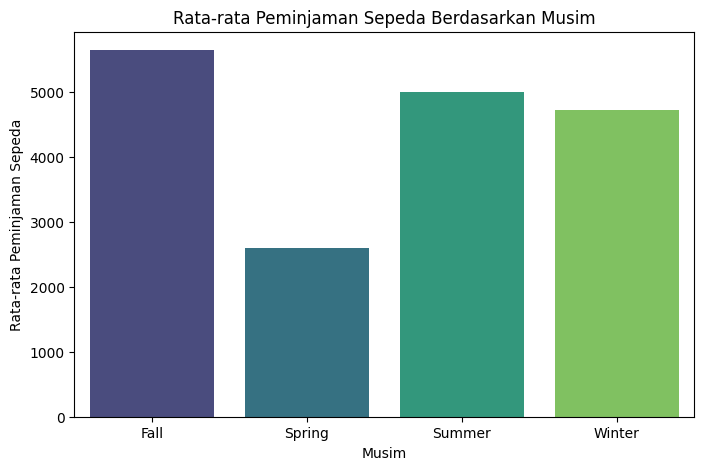

In [ ]:
# Data pinjam berdasarkan musim
musim_df = day_df.groupby("season")["cnt"].mean()
print("\nJumlah peminjaman sepeda berdasarkan musim\n",musim_df)

# bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=musim_df.index, y=musim_df.values, hue=musim_df.index, palette="viridis", legend=False)

# judul dan label
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman Sepeda")

# Menampilkan grafik
plt.show()


Jumlah peminjaman sepeda berdasarkan cuaca
 season
Fall      5644.303191
Spring    2604.132597
Summer    4992.331522
Winter    4728.162921
Name: cnt, dtype: float64


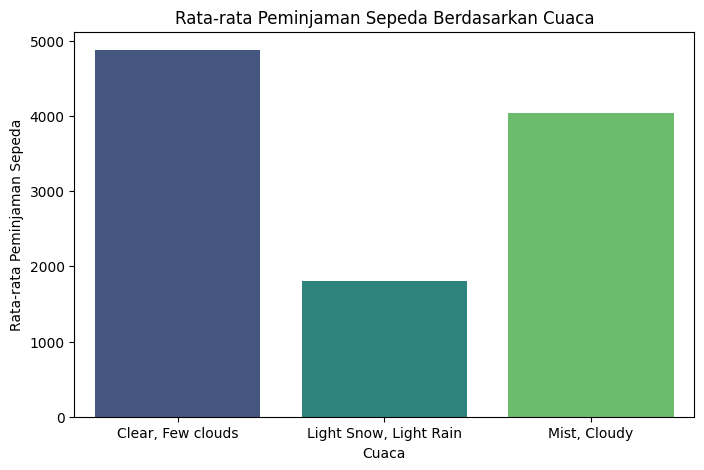

In [ ]:
# Data pinjam berdasarkan musim
cuaca_df = day_df.groupby("weathersit")["cnt"].mean()
print("\nJumlah peminjaman sepeda berdasarkan cuaca\n",musim_df)

# bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=cuaca_df.index, y=cuaca_df.values, hue=cuaca_df.index, palette="viridis", legend=False)

# judul dan label
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Cuaca")
plt.xlabel("Cuaca")
plt.ylabel("Rata-rata Peminjaman Sepeda")

# Menampilkan grafik
plt.show()

**Insight:**
- Grafik ini menunjukan rata-rata peminjaman sepeda berdasarkan musim dan cuaca. menggunakan bar plot agar mudah membedakan setiap musim dan cuacanya.
- Peminjaman paling tinggi terjadi pada musim gugur, dan saat cuacanya cerah.
- Hal tersebut menunjukan bahwa orang-orang cenderung menggunakan sepeda saat cuacanya cerah dan tidak hujan, serta saat musimnya memungkinkan

## Analisis Lanjutan (Opsional)

Text(0, 0.5, 'Biasa')

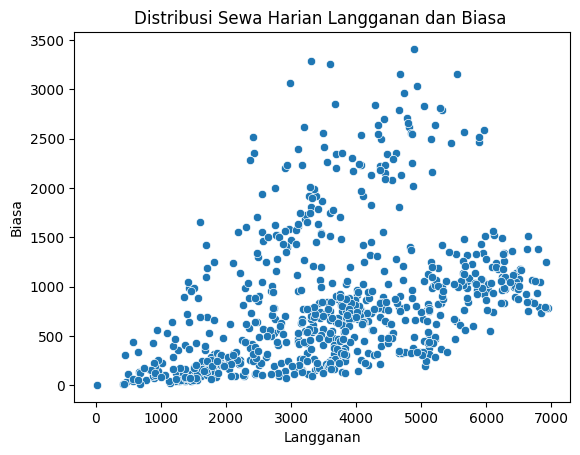

In [ ]:
sns.scatterplot(x='registered', y="casual", data=day_df)
plt.title("Distribusi Sewa Harian Langganan dan Biasa ")
plt.xlabel("Langganan")
plt.ylabel("Biasa")

**Insight:**
- Grafik ini menunjukan distribusi dari peminjam langganan dan biasa secara harian. dapat dilihat bahwa jumlah peminjam langganan lebih banyak dibandingkan biasa.

## Conclusion

Setelah melakukan proses analisis mulai dari Data Wrangling, Exploratory Data Analysis (EDA), Visualization & Explanatory Analysis, hingga Analisis Lanjutan, berikut adalah kesimpulan utama yang dapat diambil dari hasil proyek analisis data ini


1. Peminjaman sepeda memiliki pola harian yang berbeda antara hari kerja dan akhir pekan.
Pada hari kerja, peminjaman sepeda ada lonjakan pada jam 08:00 dan 17:00, dengan jumlah peminjaman tertinggi terjadi pada jam 17:00 sebanyak 525 peminjaman, menunjukkan bahwa sepeda banyak digunakan untuk berangkat dan pulang kerja/sekolah. Peminjaman terendah terjadi pada jam 03:00 dengan hanya 5 peminjaman, menunjukkan bahwa aktivitas peminjaman sepeda hampir tidak ada pada dini hari. Pola peminjaman pada hari kerja menunjukkan dua lonjakan utama, yaitu pada pagi hari sekitar jam 08:00 untuk perjalanan ke kantor/sekolah dan sore hari sekitar jam 17:00 - 18:00 saat orang-orang pulang kerja/sekolah.
Setelah jam 19:00, peminjaman sepeda mulai turun secara signifikan hingga dini hari.
Pada akhir pekan, pola peminjaman lebih merata, dengan puncak peminjaman terjadi pada jam 13:00 dengan 373 peminjaman, menunjukkan bahwa sepeda lebih sering digunakan untuk aktivitas rekreasi atau santai.
Tidak ada lonjakan signifikan di pagi atau sore hari seperti pada hari kerja, menandakan bahwa pengguna sepeda pada akhir pekan lebih fleksibel dalam memilih waktu peminjaman.   

2.   Musim gugur (Fall) memiliki jumlah peminjaman tertinggi dengan total 1.061.129 peminjaman dan rata-rata 5.644 peminjaman per hari, kemungkinan karena kondisi cuaca yang ideal untuk bersepeda.
Musim semi (Spring) memiliki jumlah peminjaman terendah dengan total 471.348 peminjaman dan rata-rata 2.604 peminjaman per hari, yang mungkin disebabkan oleh hujan yang lebih sering terjadi.
Musim panas (Summer) dan musim dingin (Winter) memiliki jumlah peminjaman yang cukup tinggi, meskipun sedikit lebih rendah dibandingkan musim gugur.

3. Orang-orang cenderung lebih banyak menggunakan sepeda saat musim dan cuacanya memungkinkan untuk menggunakan sepeda. Hal ini sejalan dengan sebanyak 2.257.952 sewa sepeda terjadi pada cuaca cerah dan sedikit berawan (Clear, Few clouds). Peminjaman sepeda paling sedikit terjadi saat cuacanya bersalju dan hujan ringan (Light Snow, Light Rain) sebanyak 37.869, sangat bebeda jauh sekali saat cuacanya cerah. Cukup signifikan dibanding saat berkabut dan berawan (Mist, Cloudy) sebanyak 996.858.

Pengaruh musim tidak begitu jauh signifikan terhadap jumlah peminjaman sepeda, berbeda dengan cuaca yang sangat berpengaruh dengan jumlah peminjaman sepeda. Karena musim-musim yang ada bisa memiliki cuaca yang berbeda beda, masyarakat lebih cenderung menggunakan sepeda saat cuacanya memungkinkan dan ideal, seperti saat cerah ataupun berawan. Jarang sekali masyarakat yang meminjam dan menggunakan sepeda saat musim salju dan hujan.

Stategi bisnis yang dapat dilakukan
- Menambah unit sepeda ketika waktu peminjaman tinggi, hal ini berupaya agar bisa memaksimalkan sepeda yang disewakan dengan harapan menambah income.
- Melakukan promo di waktu-waktu yang sepi peminjaman, eperti saat dini hari dan juga ketika cuacanya buruk,hal ini bertujuan dengan asumsi menambah jumlah peminjman di waktu yang sepi.
- Dapat melakukan promosi ketika musim semi, karena waktu ini terdapat penurunan jumlah sewa yang cukup signifikan.




In [ ]:
# Menggabungkan hour_df dan day_df berdasarkan dteday
all_df = pd.merge(
    left=hour_df,  # Data peminjaman per jam
    right=day_df,  # Data peminjaman per hari
    how="left",  # Menggunakan join kiri agar semua data dari hour_df tetap ada
    on="dteday",  # Menggabungkan berdasarkan tanggal
    suffixes=("_hour", "_day")  # Menambahkan akhiran agar tidak ada duplikasi nama kolom
)

# Menyimpan ke file CSV
all_df.to_csv("all_data.csv", index=False)
all_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant_hour     17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   season_hour      17379 non-null  object        
 3   yr_hour          17379 non-null  int64         
 4   mnth_hour        17379 non-null  int64         
 5   hr               17379 non-null  int64         
 6   holiday_hour     17379 non-null  int64         
 7   weekday_hour     17379 non-null  int64         
 8   workingday_hour  17379 non-null  int64         
 9   weathersit_hour  17379 non-null  object        
 10  temp_hour        17379 non-null  float64       
 11  atemp_hour       17379 non-null  float64       
 12  hum_hour         17379 non-null  float64       
 13  windspeed_hour   17379 non-null  float64       
 14  casual_hour      17379 non-null  int64